In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
df =  pd.read_csv("/home/jerome/Documents/CSV FILE/babies.csv")

In [4]:
df

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0
...,...,...,...,...,...,...,...,...
1231,1232,113,275.0,1,27.0,60.0,100.0,0.0
1232,1233,128,265.0,0,24.0,67.0,120.0,0.0
1233,1234,130,291.0,0,30.0,65.0,150.0,1.0
1234,1235,125,281.0,1,21.0,65.0,110.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [6]:
df =  df.drop("case", axis = 1)

In [7]:
df.isna().sum()

bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [8]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())

In [9]:
labels = {
    'x': 'gestation',
    'y' : 'age',
    'z' : 'weight'
}
plot = px.scatter_3d(df, x= 'gestation', y = 'age', z = 'weight', labels= labels, height= 800, width= 1200,)
plot.show()

**PREPROCESSING**

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
val = df[['age','gestation','weight']]

In [12]:
val

,age,gestation,weight
0,27.0,284.000000,100.0
1,33.0,282.000000,135.0
2,28.0,279.000000,115.0
3,36.0,279.338512,190.0
4,23.0,282.000000,125.0
...,...,...,...
1231,27.0,275.000000,100.0
1232,24.0,265.000000,120.0
1233,30.0,291.000000,150.0
1234,21.0,281.000000,110.0


In [13]:
inertia = []
num_cluster = [i for i in range(2,11)]
sil_score = []

for i in num_cluster:
    km = KMeans(n_clusters= i, random_state= 42)
    km.fit(val)
    inertia.append(km.inertia_)
    sil_score.append(silhouette_score(val,km.labels_))

In [14]:
inertia

[569959.529302729,
 443282.89541634556,
 350983.94145039725,
 294151.8392444419,
 253743.1126899263,
 233665.5473127357,
 217517.29627468943,
 197927.66029792666,
 186972.28916552808]

In [15]:
print(sil_score)

[np.float64(0.39478376904125506), np.float64(0.28835187905757187), np.float64(0.30548640373075614), np.float64(0.30510103687803863), np.float64(0.28512474903370716), np.float64(0.27083698579523785), np.float64(0.26230404637326643), np.float64(0.2553825855301903), np.float64(0.25325942363269416)]


<Axes: >

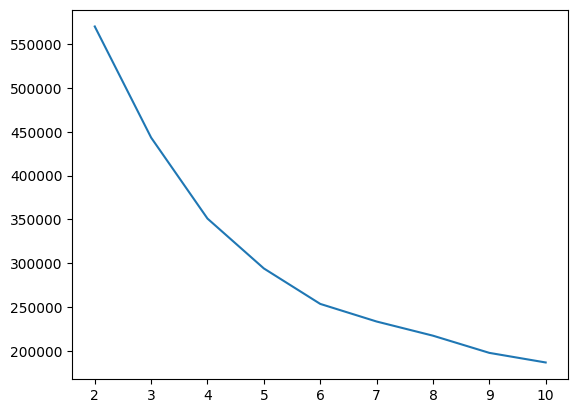

In [16]:
sns.lineplot(y = inertia, x= num_cluster)

<Axes: >

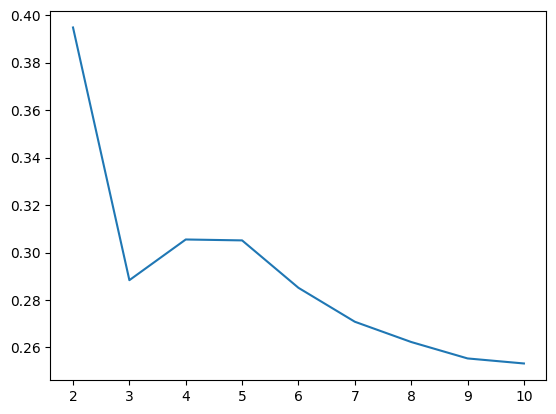

In [17]:
sns.lineplot(y = sil_score, x= num_cluster)

In [18]:
k = KMeans(n_clusters= 5, random_state= 15)
k.fit(val)

KMeans(n_clusters=5, random_state=15)

In [19]:
df['cluster1'] = k.labels_

In [20]:
labels = {
    'x': 'gestation',
    'y' : 'age',
    'z' : 'weight'
}
plot = px.scatter_3d(df, x= 'gestation', y = 'age', z = 'weight', labels= labels, height= 800, width= 1200, color= 'cluster1')
plot.show()

In [21]:
k = KMeans(n_clusters= 4, random_state= 4)
k.fit(val)


KMeans(n_clusters=4, random_state=4)

In [22]:
df['cluster2'] = k.labels_

In [23]:
labels = {
    'x' : 'gestation',
    'y' : 'age',
    'z' : 'weight'
}
plot = px.scatter_3d(df, x = 'gestation', y= 'age', z = 'weight', labels = 'labels', height = 800, width= 1200, color= 'cluster2')
plot.show()

In [24]:
df['age'].mean()

np.float64(27.255267423014587)

In [25]:
df['weight'].mean()

np.float64(128.62583333333333)

In [26]:
df['gestation'].mean()

np.float64(279.33851185609154)